#image-to-3D demo

In [ ]:
#@title install (only run once)
%rm -r dreamgaussian
!git clone https://github.com/dreamgaussian/dreamgaussian
%cd dreamgaussian

# install dependencies
!pip install -q einops plyfile dearpygui huggingface_hub diffusers accelerate transformers xatlas trimesh PyMCubes pymeshlab rembg[gpu,cli] omegaconf ninja

# build extension from source (can be slow)
# !git clone --recursive https://github.com/ashawkey/diff-gaussian-rasterization
# !pip install -q ./diff-gaussian-rasterization
# !pip install -q ./simple-knn

# pre-built wheels (faster)
!pip install -q https://github.com/camenduru/diff-gaussian-rasterization/releases/download/v1.0/diff_gaussian_rasterization-0.0.0-cp310-cp310-linux_x86_64.1.whl
!pip install -q https://github.com/camenduru/diff-gaussian-rasterization/releases/download/v1.0/simple_knn-0.0.0-cp310-cp310-linux_x86_64.1.whl

# nvdiffrast
!pip install -q git+https://github.com/NVlabs/nvdiffrast

# kiuikit
!pip install -q git+https://github.com/ashawkey/kiuikit

%mkdir -p data

rm: cannot remove 'dreamgaussian': No such file or directory
Cloning into 'dreamgaussian'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 171 (delta 75), reused 49 (delta 39), pack-reused 64
Receiving objects: 100% (171/171), 1.24 MiB | 16.28 MiB/s, done.
Resolving deltas: 100% (89/89), done.
/content/dreamgaussian
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.4/229.4 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.5/688.5 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.3/274.3 kB 27.7 MB/s eta 0:00:00
     ━━

#Image Generation
### Choose SDXL-LCM for better results

##SD2.1

(run only once)

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

###Generate Image using text
####- type your prompt and press shift+Enter

  0%|          | 0/50 [00:00<?, ?it/s]

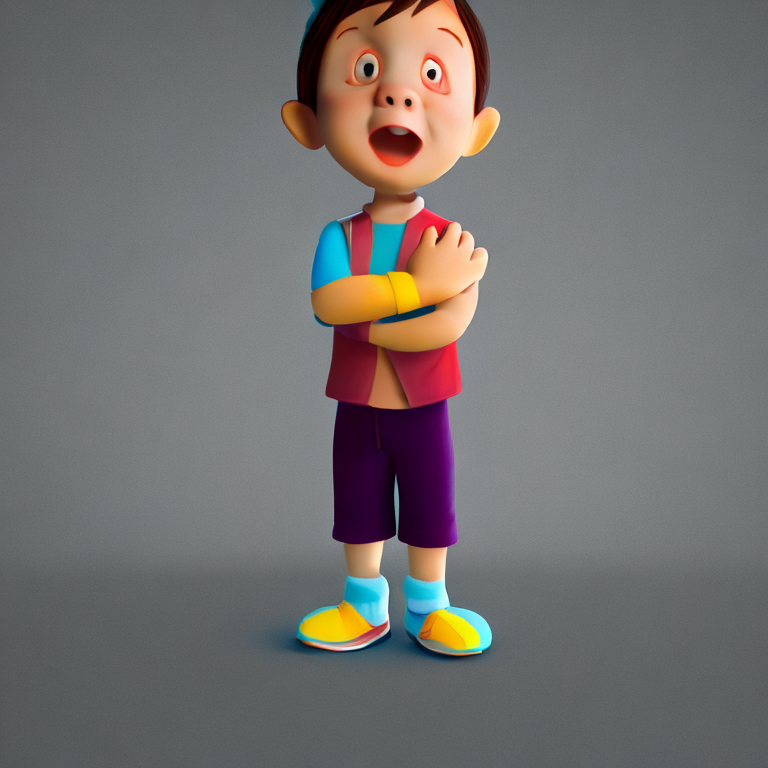

In [ ]:
from IPython.display import display
from PIL import Image
import requests
from io import BytesIO

your_prompt = "Disney little boy, standing" #@param {type: 'string'}
prompt = "3D style, " + your_prompt +", (high detailed:1.2), 8k uhd, dslr, soft lighting, high quality, Fujifilm XT3"
image = pipe(prompt).images[0]
gen_image_pth = "/content/dreamgaussian/data/output_image.png"
IMAGE = "output_image.png"
NAME = "output_image"

# Convert the image object to a displayable format
image_data = BytesIO()
image.save(image_data, format='PNG')
image_data.seek(0)

# Display the image
display(Image.open(image_data))
image.save(gen_image_pth)

##SDXL-LCM


####run this for multiple generations:

#####requirements

In [ ]:
!pip uninstall -y diffusers
!pip install transformers diffusers accelerate
import os
os.kill(os.getpid(), 9)

Found existing installation: diffusers 0.24.0
Uninstalling diffusers-0.24.0:
  Successfully uninstalled diffusers-0.24.0
  Using cached diffusers-0.24.0-py3-none-any.whl (1.8 MB)


#####Load pipeline

In [ ]:
from diffusers import DiffusionPipeline, UNet2DConditionModel, LCMScheduler
import torch

unet = UNet2DConditionModel.from_pretrained(
    "latent-consistency/lcm-sdxl",
    torch_dtype=torch.float16,
    variant="fp16",
)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", unet=unet, torch_dtype=torch.float16
).to("cuda")
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)


config.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


####Prompt here

  0%|          | 0/10 [00:00<?, ?it/s]

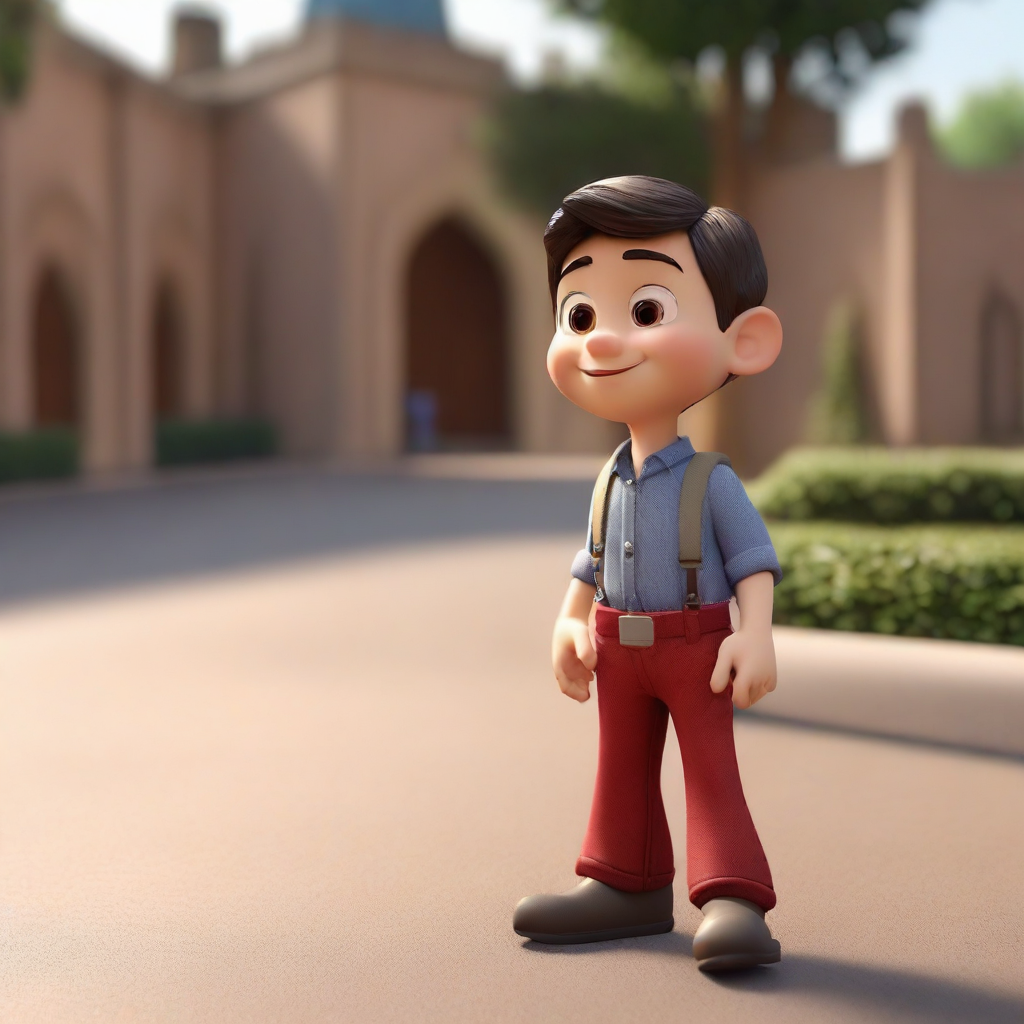

In [ ]:
your_prompt = "Disney little boy, standing" #@param {type: 'string'}
prompt = "(style:3d Render) "+ your_prompt +", (high detailed:1.5), 8k uhd, dslr, soft lighting, high quality, perfect structure"

image = pipe(
    prompt=prompt, num_inference_steps=10, guidance_scale=8.0
).images[0]

gen_image_pth = "/content/dreamgaussian/data/output_image.png"

image.save(gen_image_pth)
image

##3d generations (follow below for multiple generations)

####requirements

In [ ]:
!pip uninstall -y diffusers
!pip install diffusers==0.20 rembg accelerate
import os
os.kill(os.getpid(), 9)

Found existing installation: diffusers 0.24.0
Uninstalling diffusers-0.24.0:
  Successfully uninstalled diffusers-0.24.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.8 MB/s eta 0:00:00


###Remove Background

/content/dreamgaussian


100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 25.0GB/s]


[INFO] loading image data/output_image.png...
[INFO] background removal...
[INFO] recenter...


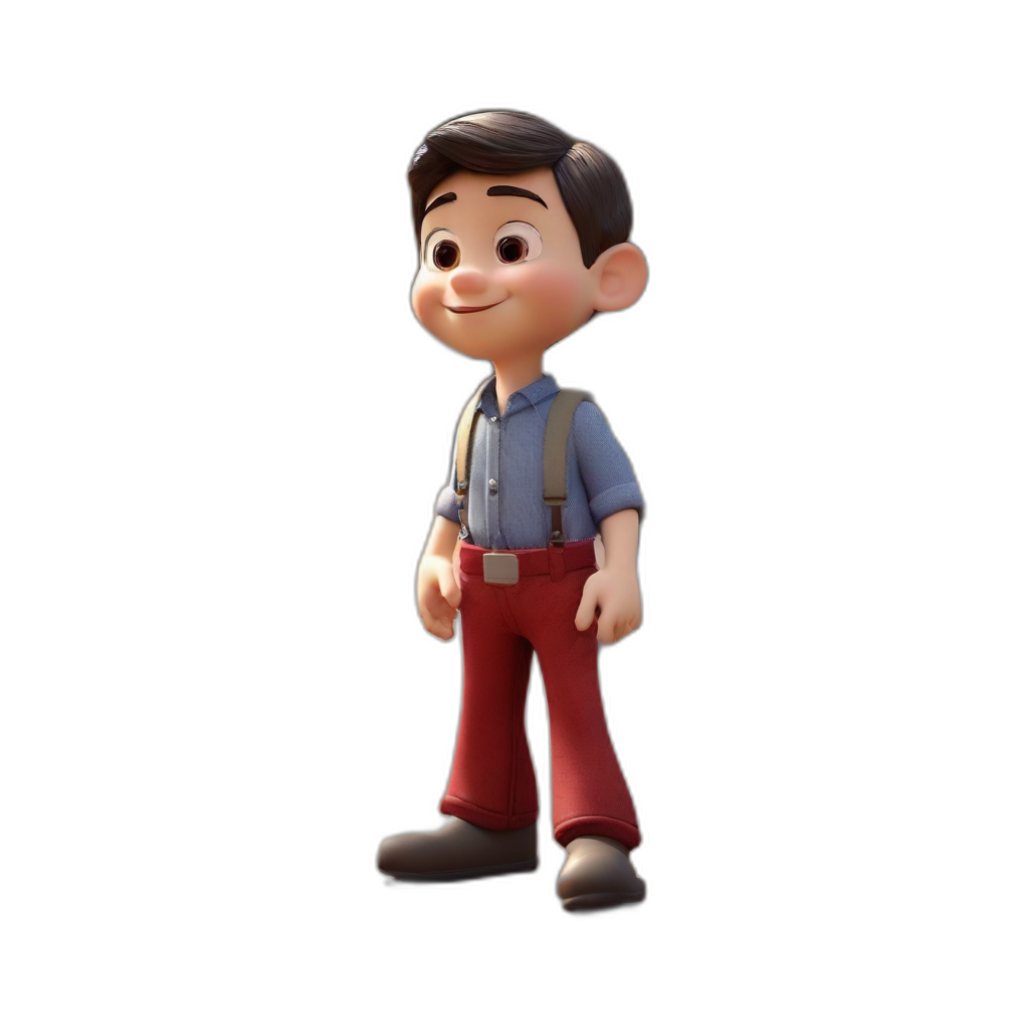

In [ ]:
%cd dreamgaussian
import os

IMAGE = "output_image.png"
NAME = "output_image"
size = 1024

# preprocess
%run process.py data/{IMAGE} --size={size}

# NAME = os.path.splitext(IMAGE)[0]
IMAGE_PROCESSED = NAME + '_rgba.png'

# display processed image
from IPython.display import Image, display
display(Image(f'data/{IMAGE_PROCESSED}', width=size, height=size))

# Settings
* Elevation: estimated elevation angle, default to 0 (horizontal), range from [-90, 90]. If you upload a look-down image, try a value like -30.

In [ ]:
#@markdown ####**Settings:**
Elevation = 0 #@param {type: 'integer'}

In [ ]:
#@title training!

# stage 1
%run main.py --config configs/image.yaml input=data/{IMAGE_PROCESSED} ref_size={size} save_path={NAME} elevation={Elevation} iters=10000 force_cuda_rast=True

# stage 2
%run main2.py --config configs/image.yaml input=data/{IMAGE_PROCESSED} ref_size={size} save_path={NAME} elevation={Elevation} iters_refine=50 force_cuda_rast=True

[INFO] load image from data/output_image_rgba.png...
Number of points at initialisation :  5000
[INFO] loading zero123...


model_index.json:   0%|          | 0.00/562 [00:00<?, ?B/s]

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

clip_camera_projection/config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'trust_remote_code': True} are not expected by Zero123Pipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

The config attributes {'dropout': 0.0, 'reverse_transformer_layers_per_block': None} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


[INFO] loaded zero123!


100%|██████████| 10000/10000 [36:11<00:00,  4.61it/s]


[INFO] save model to logs/output_image_model.ply.


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Tensor occ torch.Size([128, 128, 128]) torch.float32 cuda:0 ∈ [0.0, 111.84306335449219] μ = 0.05320608615875244 σ =
0.6601307988166809

[INFO] mesh cleaning: (23004, 3) --> (23639, 3), (45652, 3) --> (47429, 3)
[INFO] marching cubes result: torch.Size([23639, 3]) (-1.2009490728378296-0.7491956949234009), torch.Size([47429, 3])
[INFO] unwrap uv...
[INFO] save model to logs/output_image_mesh.obj.
[load_obj] use texture from: logs/output_image_mesh_albedo.png
[load_obj] load texture: (1024, 1024, 3)
[Mesh loading] v: torch.Size([34502, 3]), f: torch.Size([47429, 3])
[Mesh loading] vn: torch.Size([34502, 3]), fn: torch.Size([47429, 3])
[INFO] load image from data/output_image_rgba.png...
[INFO] loading zero123...


Keyword arguments {'trust_remote_code': True} are not expected by Zero123Pipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

The config attributes {'dropout': 0.0, 'reverse_transformer_layers_per_block': None} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


[INFO] loaded zero123!


100%|██████████| 50/50 [00:24<00:00,  2.04it/s]


[INFO] save model to logs/output_image.obj.


In [ ]:
#@title render a video for displaying

# the final mesh is saved to ./logs/NAME.obj
%run -m kiui.render logs/{NAME}.obj --save_video {NAME}.mp4 --wogui --force_cuda_rast

from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width=1024):
  video_file = open(video_path, "r+b").read()
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
print(" if you liked the output you can get the model here '/content/dreamgaussian/logs'")
show_video(f'{NAME}.mp4')

[load_obj] use texture from: logs/output_image_albedo.png
[load_obj] load texture: (1024, 1024, 3)
[Mesh loading] v: torch.Size([34502, 3]), f: torch.Size([47429, 3])
[Mesh loading] vn: torch.Size([34502, 3]), fn: torch.Size([47429, 3])


100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


 if you liked the output you can get the model here '/content/dreamgaussian/logs'
